# MLflow 

### What is MLflow?
### "An open source platform for the machine learning lifecycle" - MLflow.org

Components of MLflow: <br>

MLflow Tracking: <br>
Record metrics and parameters from training runs. Query data from experiments. Store models, artifacts and code.

Model Registry: <br>
Store and version ML models. Load and deploy ML models.

MLflow Models: <br>
Standardize models for deployment. Build customized models.

MLflow Projects: <br>
Package ML code for reproducibility. Package ML code for repeatability.


## MLflow

In [1]:
# Import MLflow
import mlflow


In [2]:
# Create new experiment
mlflow.create_experiment("Unicorn Model")

# Tag new experiment
mlflow.set_experiment_tag("version", "1.0")

# Set the experiment
mlflow.set_experiment("Unicorn Model")


<Experiment: artifact_location='file:///Users/ninhnguyen/mlruns/152923468911448618', creation_time=1685601222155, experiment_id='152923468911448618', last_update_time=1685601222155, lifecycle_stage='active', name='Unicorn Model', tags={}>

In [3]:
# Create new experiment
mlflow.create_experiment("Unicorn Sklearn Experiment")

# Set the experiment
mlflow.set_experiment("Unicorn Sklearn Experiment")

# Start a run
run = mlflow.start_run() 


In [4]:
# r2_score = r2_score(y_test, y_pred)

# # Log metrics
# mlflow.log_metric("r2_score", r2_score)

# # Log parameter
# mlflow.log_param("n_jobs", n_jobs)

# # Log the training code
# mlflow.log_artifact("train.py")


In [5]:
#import module
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import pandas as pd


In [6]:
df = pd.read_csv('insurance.csv')
df


,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,1333,50,male,30.970,3,no,northwest,10600.54830
1334,1334,18,female,31.920,0,no,northeast,2205.98080
1335,1335,18,female,36.850,0,no,southeast,1629.83350
1336,1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
df = pd.get_dummies(df,columns=['sex','region'],drop_first=True)
df


,index,age,bmi,children,smoker,charges,sex_male,region_northwest,region_southeast,region_southwest
0,0,19,27.900,0,yes,16884.92400,0,0,0,1
1,1,18,33.770,1,no,1725.55230,1,0,1,0
2,2,28,33.000,3,no,4449.46200,1,0,1,0
3,3,33,22.705,0,no,21984.47061,1,1,0,0
4,4,32,28.880,0,no,3866.85520,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,1333,50,30.970,3,no,10600.54830,1,1,0,0
1334,1334,18,31.920,0,no,2205.98080,0,0,0,0
1335,1335,18,36.850,0,no,1629.83350,0,0,1,0
1336,1336,21,25.800,0,no,2007.94500,0,0,0,1


In [8]:
# Create X and y arrays
X = df.drop("smoker", axis=1).values
y = df["smoker"].values


In [9]:
# train/test split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
# Create new experiment
mlflow.create_experiment("LR Experiment")

# Set Experiment
mlflow.set_experiment("LR Experiment")

# Start a run
mlflow.start_run(nested=True)

# Model Training Code here
lr = LogisticRegression(n_jobs=1)

# Model evaluation Code here
lr.fit(X, y)
score = lr.score(X, y)
print(score)

# Log a metric
mlflow.log_metric("score", score)

# Log a parameter
mlflow.log_param("n_jobs", 1)

# Log an artifact
mlflow.log_artifact("train_code.py")


0.9409566517189836


In [11]:
import subprocess

def start_mlflow_ui():
    subprocess.Popen(["mlflow", "ui"])

# Call the function to start the MLflow UI
start_mlflow_ui()


In [12]:
# Create a filter string for metric score
score_filter = "metrics.score > .70"

# Search runs
mlflow.search_runs(experiment_names=["LR Experiment"], 
                   filter_string=score_filter, 
                   order_by=["metrics.score DESC"])


,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.score,params.n_jobs,tags.mlflow.source.name,tags.mlflow.source.type,tags.mlflow.user,tags.mlflow.runName,tags.mlflow.parentRunId
0,e1593fcc713648b59f936716d8755ccb,764361620783241606,RUNNING,file:///Users/ninhnguyen/mlruns/76436162078324...,2023-06-01 06:33:42.658000+00:00,None,0.940957,1,/Users/ninhnguyen/anaconda3/lib/python3.10/sit...,LOCAL,ninhnguyen,crawling-roo-157,e81f9fcfcf5d4db4ac4c3fee1e21e265


## MLflow Models

In [13]:
#import module
from sklearn.linear_model import LinearRegression


In [14]:
unicorn = pd.read_csv('50_Startups.csv')
unicorn


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [15]:
unicorn.dtypes


R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [16]:
unicorn['State'] = unicorn['State'].astype('category')


In [17]:
unicorn.dtypes


R&D Spend           float64
Administration      float64
Marketing Spend     float64
State              category
Profit              float64
dtype: object

In [18]:
unicorn = unicorn.drop(columns='State')


In [19]:
# Create X and y arrays
X = unicorn.drop("Profit", axis=1).values
y = unicorn["Profit"].values


In [20]:
# train/test split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
# Import Scikit-learn flavor
import mlflow.sklearn

# Create new experiment
mlflow.create_experiment("SKlearn Model")

# Set the experiment to "Sklearn Model"
mlflow.set_experiment("SKlearn Model")

# Start a run
mlflow.start_run(nested=True)

# Set Auto logging for Scikit-learn flavor 
mlflow.sklearn.autolog()

lr = LinearRegression()
lr.fit(X_train, y_train)

# Get a prediction from test data
print(lr.predict(X_test))

print(lr.score(X_test, y_test))


[2023-05-31 23:33:43 -0700] [33671] [INFO] Starting gunicorn 20.1.0
[2023-05-31 23:33:43 -0700] [33671] [INFO] Listening at: http://127.0.0.1:5000 (33671)
[2023-05-31 23:33:43 -0700] [33671] [INFO] Using worker: sync
[2023-05-31 23:33:43 -0700] [33672] [INFO] Booting worker with pid: 33672
[2023-05-31 23:33:43 -0700] [33673] [INFO] Booting worker with pid: 33673
[2023-05-31 23:33:44 -0700] [33674] [INFO] Booting worker with pid: 33674
[2023-05-31 23:33:44 -0700] [33675] [INFO] Booting worker with pid: 33675
2023/05/31 23:33:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/ninhnguyen/anaconda3/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


[125972.1482631   85471.92270964  98924.15168288  46639.7862872
 128142.12473185  52602.19053671 108364.69760175 100331.58846892
  97538.56674666 112496.70398401 128110.85388838 173383.29618108
  93334.03668271 149432.23776236 173293.94964905]
0.9418819530700163


In [22]:
# Search runs
mlflow.search_runs(experiment_names=["SKlearn Model"])


,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.training_root_mean_squared_error,metrics.training_r2_score,metrics.training_mean_squared_error,metrics.training_score,...,params.copy_X,params.n_jobs,tags.mlflow.log-model.history,tags.mlflow.source.type,tags.mlflow.runName,tags.estimator_name,tags.mlflow.source.name,tags.estimator_class,tags.mlflow.user,tags.mlflow.parentRunId
0,3651a8d3968c418faf0eba6fb0154dc5,934170736661356527,RUNNING,file:///Users/ninhnguyen/mlruns/93417073666135...,2023-06-01 06:33:42.774000+00:00,None,9057.693537,0.950856,8.204181e+07,0.950856,...,True,None,"[{""run_id"": ""3651a8d3968c418faf0eba6fb0154dc5""...",LOCAL,secretive-stag-957,LinearRegression,/Users/ninhnguyen/anaconda3/lib/python3.10/sit...,sklearn.linear_model._base.LinearRegression,ninhnguyen,e1593fcc713648b59f936716d8755ccb


In [23]:
# # Load model from local filesystem
# model = mlflow.sklearn.load_model("lr_local_v1")

# # Training Data
# X = df[["R&D Spend", "Administration", "Marketing Spend", "State"]]
# y = df[["Profit"]]
# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=0)
# # Train Model
# model.fit(X_train, y_train)

# # Save model to local filesystem
# mlflow.sklearn.save_model(model, "lr_local_v2")


In [24]:
# # Log model to MLflow Tracking
# mlflow.sklearn.log_model(lr_model, "lr_tracking")

# # Get the last run
# run = mlflow.last_active_run()

# # Get the run_id of the above run
# run_id = run.info.run_id

# # Load model from MLflow Tracking
# model = mlflow.sklearn.load_model(f"runs:/{run_id}/lr_tracking")


In [25]:
# Create Python Class
class CustomPredict(mlflow.pyfunc.PythonModel):
    # Set method for loading model
    def load_context(self, context):
        self.model = mlflow.sklearn.load_model("./lr_model/")
    # Set method for custom inference     
    def predict(self, context, model_input):
        predictions = self.model.predict(model_input)
        decoded_predictions = []  
        for prediction in predictions:
            if prediction == 0:
                decoded_predictions.append("female")
            else:
                decoded_predictions.append("male")
        return decoded_predictions
    

In [26]:
# # Log the pyfunc model 
# mlflow.pyfunc.log_model(
#     artifact_path="lr_pyfunc", 
#     # Set model to use CustomPredict Class
#     python_model=CustomPredict(), 
#     artifacts={"lr_model": "lr_model"}
# )

# run = mlflow.last_active_run()
# run_id = run.info.run_id

# # Load the model in python_function format
# loaded_model = mlflow.pyfunc.load_model(f"runs:/{run_id}/lr_pyfunc")


In [27]:
# # Eval Data
# eval_data = X_test
# eval_data["sex_male"] = y_test

# # Log the model using Scikit-Learn Flavor
# mlflow.sklearn.log_model(score, "model")

# # Get run id
# run = mlflow.last_active_run()
# run_id = run.info.run_id

# # Evaluate the logged model with eval_data data
# mlflow.evaluate(f"runs:/{run_id}/model", 
#                 data=eval_data, 
#                 targets="sex_male",
#                 model_type="classifier"
# )


## Mlflow Model Registry

In [28]:
# Import MLflow Client from MLflow module
from mlflow import MlflowClient


In [29]:
# Create an instance of MLflow Client Class named client
client = MlflowClient()

# Create new model
client.create_registered_model("Insurance")


<RegisteredModel: aliases={}, creation_timestamp=1685601225619, description=None, last_updated_timestamp=1685601225619, latest_versions=[], name='Insurance', tags={}>

In [30]:
# Insurance filter string
insurance_filter_string = "name LIKE 'Insurance%'"

# Search for Insurance models
print(client.search_registered_models(filter_string=insurance_filter_string))

# Not Insurance filter string
not_insurance_filter_string = "name != 'Insurance%'"

# Search for non Insurance models
print(client.search_registered_models(filter_string=not_insurance_filter_string))


[<RegisteredModel: aliases={}, creation_timestamp=1685601225619, description=None, last_updated_timestamp=1685601225619, latest_versions=[], name='Insurance', tags={}>]
[<RegisteredModel: aliases={}, creation_timestamp=1685601225619, description=None, last_updated_timestamp=1685601225619, latest_versions=[], name='Insurance', tags={}>]


In [31]:
# Register the first model
mlflow.register_model("model_2022", "Insurance")

# # Register the second model
# mlflow.register_model(f"runs:/{run_id}/model_2023", "Insurance")


Registered model 'Insurance' already exists. Creating a new version of this model...
2023/05/31 23:33:45 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Insurance, version 1
Created version '1' of model 'Insurance'.


<ModelVersion: aliases=[], creation_timestamp=1685601225626, current_stage='None', description=None, last_updated_timestamp=1685601225626, name='Insurance', run_id=None, run_link=None, source='model_2022', status='READY', status_message=None, tags={}, user_id=None, version=1>

In [32]:
# Log the model using scikit-learn flavor
mlflow.sklearn.log_model(lr, "model", registered_model_name="Insurance")
insurance_filter_string = "name = 'Insurance'"

# Search for Insurance models
print(client.search_registered_models(filter_string=insurance_filter_string))


Registered model 'Insurance' already exists. Creating a new version of this model...
2023/05/31 23:33:46 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: Insurance, version 2


[<RegisteredModel: aliases={}, creation_timestamp=1685601225619, description=None, last_updated_timestamp=1685601226755, latest_versions=[<ModelVersion: aliases=[], creation_timestamp=1685601226755, current_stage='None', description=None, last_updated_timestamp=1685601226755, name='Insurance', run_id='3651a8d3968c418faf0eba6fb0154dc5', run_link=None, source='file:///Users/ninhnguyen/mlruns/934170736661356527/3651a8d3968c418faf0eba6fb0154dc5/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=2>], name='Insurance', tags={}>]


Created version '2' of model 'Insurance'.


In [33]:
# Transition version 2 of Insurance model to stable stage
client.transition_model_version_stage(name="Insurance", version=2,
        stage="Production"
    )

<ModelVersion: aliases=[], creation_timestamp=1685601226755, current_stage='Production', description=None, last_updated_timestamp=1685601226762, name='Insurance', run_id='3651a8d3968c418faf0eba6fb0154dc5', run_link=None, source='file:///Users/ninhnguyen/mlruns/934170736661356527/3651a8d3968c418faf0eba6fb0154dc5/artifacts/model', status='READY', status_message=None, tags={}, user_id=None, version=2>

In [34]:
# # Transition version 3 of Insurance model to testing stage
# client.transition_model_version_stage(name="Insurance", version=3,
#         stage="Staging"
#     )

In [35]:
# Transition version 1 of Insurance model to archive stage
client.transition_model_version_stage(name="Insurance", version=1,
        stage="Archived"
    )


<ModelVersion: aliases=[], creation_timestamp=1685601225626, current_stage='Archived', description=None, last_updated_timestamp=1685601226771, name='Insurance', run_id=None, run_link=None, source='model_2022', status='READY', status_message=None, tags={}, user_id=None, version=1>

In [36]:
# # Load the Production stage of Insurance model using scikit-learn flavor
# model = mlflow.sklearn.load_model("models:/Insurance/Production")

# # Run prediction on our test data
# model.predict(X_test)        


## MLflow Projects

In [37]:
"""
# Set name of the Project
name: insurance_model

# Set the environment
python_env: python_env.yaml

entry_points:
 	# Create an entry point
 	main:
   		# Create a command
    	command: 'python3.9 train_model.py'
"""


"\n# Set name of the Project\nname: insurance_model\n\n# Set the environment\npython_env: python_env.yaml\n\nentry_points:\n \t# Create an entry point\n \tmain:\n   \t\t# Create a command\n    \tcommand: 'python3.9 train_model.py'\n"

In [38]:
# import mlflow

# # Set the run function from the MLflow Projects module
# mlflow.projects.run(
#     # Set the URI as the current working directory
#     uri='./',
#     # Set the entry point as main
#     entry_point='main',
#     # Set the experiment as Insurance
#     experiment_name='Insurance',
#     env_manager="local",
#     synchronous=True,
# )

# print(MLproject)


In [39]:
"""
name: insurance_model
python_env: python_env.yaml
entry_points:
  main:
    parameters:
      # Create parameter for number of jobs
      n_jobs:
        type: int
        default: 1
      # Create parameter for fit intercept
      fit_intercept:
        type: bool
        default: True
    # Add parameters to be passed into the command
    command: "python3.9 train_model.py {n_jobs} {fit_intercept}"
"""


'\nname: insurance_model\npython_env: python_env.yaml\nentry_points:\n  main:\n    parameters:\n      # Create parameter for number of jobs\n      n_jobs:\n        type: int\n        default: 1\n      # Create parameter for fit intercept\n      fit_intercept:\n        type: bool\n        default: True\n    # Add parameters to be passed into the command\n    command: "python3.9 train_model.py {n_jobs} {fit_intercept}"\n'

In [40]:
# import mlflow

# # Set the run function from the MLflow Projects module
# mlflow.projects.run(
#     uri='./',
#     entry_point='main',
#     experiment_name='Insurance',
#   	env_manager='local',
#   	# Set parameters for n_jobs and fit_intercept
#   	parameters={
#         'n_jobs': 2, 
#         'fit_intercept': False
#     }
# )


In [41]:
"""
name: insurance_model
python_env: python_env.yaml
entry_points:
  # Set the entry point
  model_engineering:
    parameters: 
      # Set n_jobs 
      n_jobs:
        type: int
        default: 1
      # Set fit_intercept
      fit_intercept:
        type: bool
        default: True
    # Pass the parameters to the command
    command: "python3.9 train_model.py {n_jobs} {fit_intercept}"
"""


'\nname: insurance_model\npython_env: python_env.yaml\nentry_points:\n  # Set the entry point\n  model_engineering:\n    parameters: \n      # Set n_jobs \n      n_jobs:\n        type: int\n        default: 1\n      # Set fit_intercept\n      fit_intercept:\n        type: bool\n        default: True\n    # Pass the parameters to the command\n    command: "python3.9 train_model.py {n_jobs} {fit_intercept}"\n'

In [42]:
"""
  # Set the model_evaluation entry point
  model_evaluation:
    parameters:
      # Set run_id parameter
      run_id:
        type: str 
        default: None
    # Set the parameters in the command
    command: "python3.9 evaluate.py {run_id}"
"""


'\n  # Set the model_evaluation entry point\n  model_evaluation:\n    parameters:\n      # Set run_id parameter\n      run_id:\n        type: str \n        default: None\n    # Set the parameters in the command\n    command: "python3.9 evaluate.py {run_id}"\n'

In [43]:
# # Set run method to model_engineering
# model_engineering = mlflow.projects.run(
#     uri='./',
#   	# Set entry point to model_engineering
#     entry_point='model_engineering',
#     experiment_name='Insurance',
#     #  Set the parameters for n_jobs and fit_intercept
#   	parameters={
#         'n_jobs': 2, 
#         'fit_intercept': False
#     },
#     env_manager='local'
# )

# # Set Run ID of model training to be passed to Model Evaluation step
# model_engineering_run_id = model_engineering.run_id
# print(model_engineering_run_id)


In [44]:
# # Set the MLflow Projects run method
# model_evaluation = mlflow.projects.run(
#     uri="./",
#   	# Set the entry point to model_evaluation
#     entry_point="model_evaluation",
#   	# Set the parameter run_id to the run_id output of previous step
#     parameters={
#         "run_id": model_engineering_run_id,
#     },
#     env_manager="local"
# )

# print(model_evaluation.get_status())


In [45]:
mlflow.end_run()


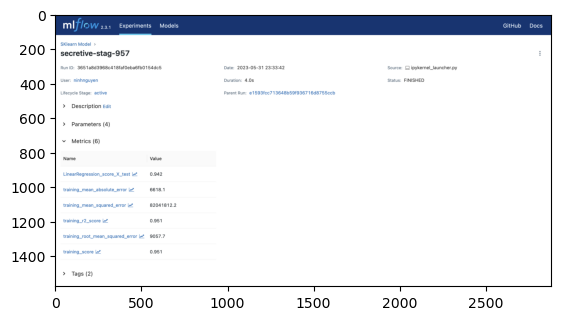

In [46]:
# import module
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read Image
img = mpimg.imread('MLflow.png')
 
# Output Image
plt.imshow(img)
